# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

This project aims to predict salaries given a set of job postings.

In [49]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

#Contact Information
__author__ = "Annette Kiplagat"
__email__ = "_@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [50]:
#load data into a Pandas dataframe
features = pd.read_csv("data/train_features.csv")
salaries = pd.read_csv("data/train_salaries.csv")

In [51]:
# Check features dataframes
features.head()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [52]:
features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [53]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [54]:
#Check Salaries dataframe
salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [55]:
salaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


In [56]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [57]:
# Combine 'salaries' and'features' data frames by 'jobId'
postings =pd.merge(features,salaries,on='jobId')
postings.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [58]:
postings.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


### ---- 3 Clean the data ----

In [59]:
# Drop any missing values
postings.dropna
postings.info() #There were no null values. Dataframe same size as original

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [60]:
# Remove rows with salary <= 0 
#postings.drop(postings['salary']==0], inplace = True )
postings.drop(postings[postings['salary']<=0].index,axis=0, inplace=True)
postings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 4 Explore the data (EDA) ----

In [61]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

a. Visualize Data: Distribution Plots

Text(0.5, 1.0, 'Salary Histogram')

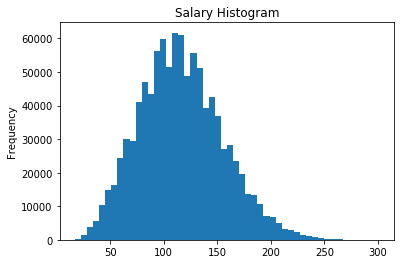

In [62]:
#Summary of Target Variable: Salary
postings['salary'].plot.hist(bins=50)
#sns.distplot(postings['salary'])
plt.title('Salary Histogram')

Text(0.5, 1.0, 'Years of Experience Histogram')

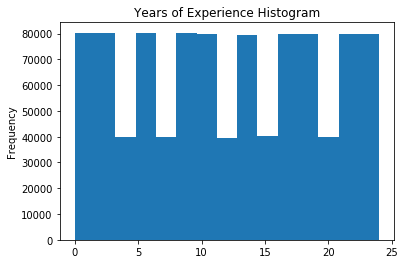

In [63]:
postings['yearsExperience'].plot.hist(bins=15)
#sns.distplot(postings['yearsExperience'],bins=10)
plt.title('Years of Experience Histogram')

Text(0.5, 1.0, 'Salary vs Years of Experience')

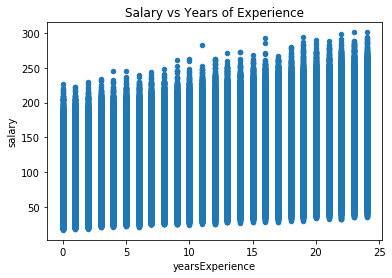

In [64]:
postings.plot.scatter(x='yearsExperience',y='salary')
plt.title('Salary vs Years of Experience')


Text(0.5, 1.0, 'milesFromMetropolis Histogram')

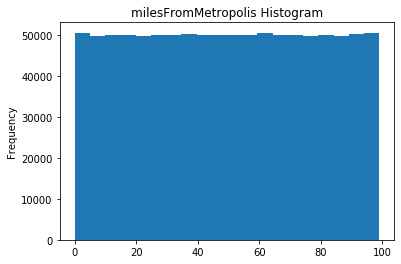

In [65]:
postings['milesFromMetropolis'].plot.hist(bins=20)
plt.title('milesFromMetropolis Histogram')

Text(0.5, 1.0, 'Salary vs Miles from Metropolis')

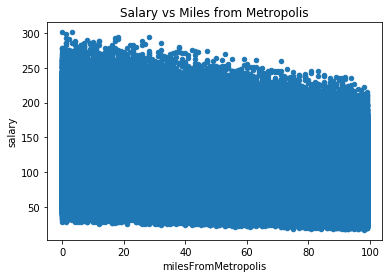

In [66]:
postings.plot.scatter(x='milesFromMetropolis',y='salary')
plt.title('Salary vs Miles from Metropolis')

b. Visualize Data: Categorical Plots 

Text(0.5, 1.0, 'Salary by Years of Experience')

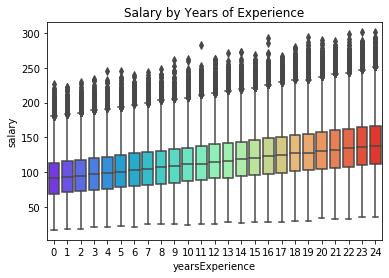

In [67]:
sns.boxplot(x="yearsExperience", y="salary", data= postings,palette='rainbow')
plt.title('Salary by Years of Experience')

Text(0.5, 1.0, 'Salary by Industry')

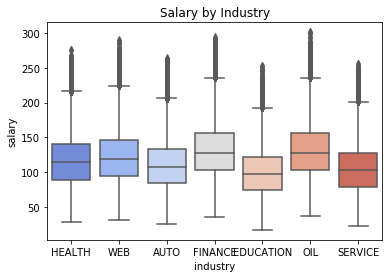

In [68]:
sns.boxplot(x="industry", y="salary", data= postings,palette='coolwarm')
plt.title('Salary by Industry')

Text(0.5, 1.0, 'Salary by Major')

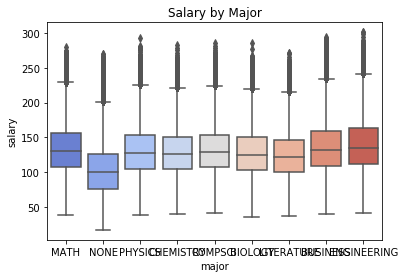

In [69]:
sns.boxplot(x="major", y="salary", data= postings,palette='coolwarm')
plt.title('Salary by Major')

Text(0.5, 1.0, 'Salary by degree')

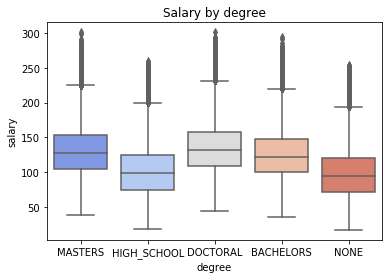

In [70]:
sns.boxplot(x="degree", y="salary", data= postings,palette='coolwarm')
plt.title('Salary by degree')

Text(0.5, 1.0, 'Salary by Job type')

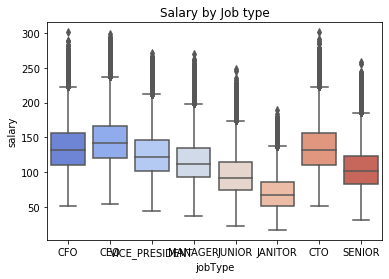

In [71]:
sns.boxplot(x="jobType", y="salary", data= postings, palette='coolwarm')
plt.title('Salary by Job type')

In [72]:
#Pairplots of data -> TAKES LONG TO RUN!!
#sns.pairplot(postings)
#sns.pairplot(postings,hue='degree_y',palette='coolwarm')

Text(0.5, 1.0, 'Salary by Company ID')

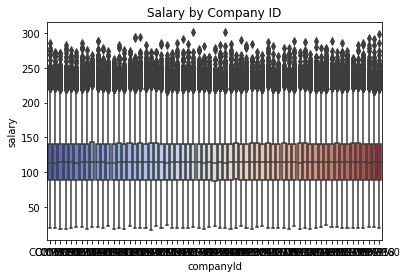

In [73]:
sns.boxplot(x="companyId", y="salary", data= postings, palette='coolwarm')
plt.title('Salary by Company ID')


Text(0.5, 1, 'feature correlations')

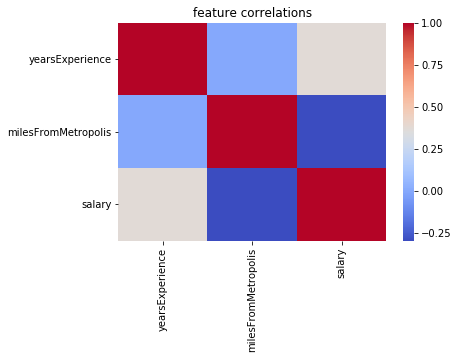

In [74]:
# Correlations Heatmap
sns.heatmap(postings.corr(), cmap='coolwarm')
plt.title('feature correlations')

### ---- 5 Establish a baseline ----

In [75]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [76]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [77]:
#Prepare data for modeling
# Create dummy variables in place of categorical data
#for column in postings.columns:
 #   if postings[column].dtype ==object:
  #      dummyCols = pd.get_dummies(postings[column])
   #     postings = postings.join(dummyCols)
      #  del postings[column]


In [78]:
# Create arrays for independent variables and target variable(salary)
jobFeatures = postings[['degree','jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]
salary = postings['salary']

In [79]:
#Create Dummy variables for independent variable matrix
jobFeatures = pd.get_dummies(data = jobFeatures,drop_first = True)
jobFeatures.head()

,yearsExperience,milesFromMetropolis,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,3,73,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,10,38,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,8,17,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


Text(0.5, 1, 'jobFeature correlations')

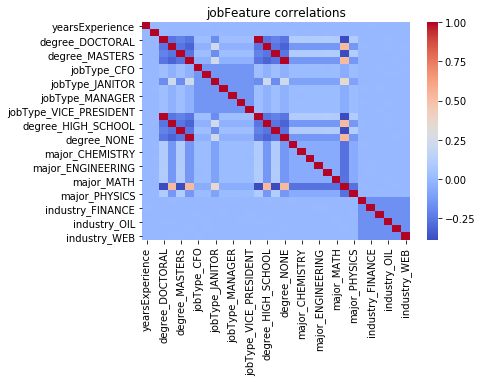

In [92]:
#Check correlations between features
sns.heatmap(jobFeatures.corr(), cmap='coolwarm')
plt.title('jobFeature correlations')

In [80]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

In [81]:
jobFeatures_train, jobFeatures_test, salary_train,salary_test = train_test_split(jobFeatures,salary,test_size=0.3,random_state=97)
#jobFeatures_train.info()


### ---- 8 Create models & 9 Test Models ----

In [82]:
# 1. Train Linear Regression Model
from sklearn.linear_model import LinearRegression

In [83]:
#Create instane of LinearRegression()
lm = LinearRegression()

In [84]:
#Train lm on training data
lm.fit(jobFeatures_train, salary_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
#show model coefficients
#print('Coefficients:\n',lm.coef_)

In [86]:
#Make Predictions 
salaryPredictions = lm.predict(jobFeatures_test)

Text(0, 0.5, 'Salary Predictions')

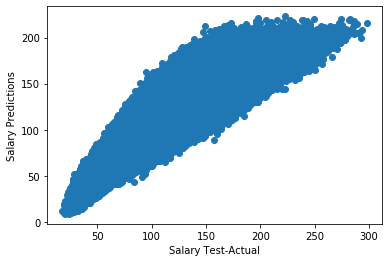

In [87]:
plt.scatter(salary_test,salaryPredictions)
plt.xlabel('Salary Test-Actual')
plt.ylabel('Salary Predictions')


Test Linear Regression model

In [88]:
#Calculate Performance Metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(salary_test, salaryPredictions))
print('MSE:', metrics.mean_squared_error(salary_test, salaryPredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(salary_test, salaryPredictions)))

MAE: 15.847998282382564
MSE: 384.2114208006221
RMSE: 19.601311711225403


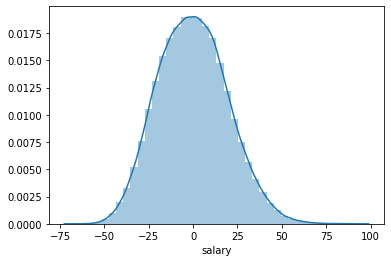

In [89]:
#Check residuals for normal distribution
sns.distplot((salary_test-salaryPredictions),bins=40)

In [91]:
#View effect of Coefficients
coefficients = pd.DataFrame(lm.coef_,jobFeatures.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
yearsExperience,2.009852e+00
milesFromMetropolis,-4.007360e-01
degree_DOCTORAL,-3.782553e+09
degree_HIGH_SCHOOL,3.895107e+09
degree_MASTERS,-8.359488e+08
degree_NONE,2.118652e+10
jobType_CFO,-9.727143e+00
jobType_CTO,-9.781893e+00
jobType_JANITOR,-6.230370e+01
jobType_JUNIOR,-4.972804e+01


In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data